In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Data Analysis\Data-Analysis\kaggle\train_abalone.csv", index_col="id")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


In [4]:
df_numeric = df.select_dtypes(include=["float64", "int64"]).columns

In [5]:
df_numeric

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot: xlabel='Rings', ylabel='Count'>

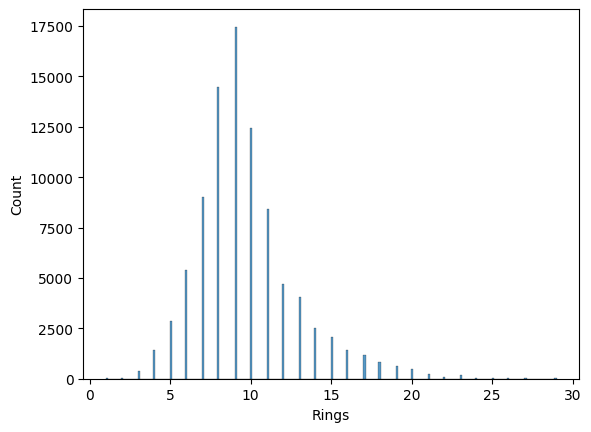

In [6]:
import seaborn as sns
sns.histplot(df["Rings"])


In [7]:
#based on the graph I think using rings as a numeric variable is a better choice


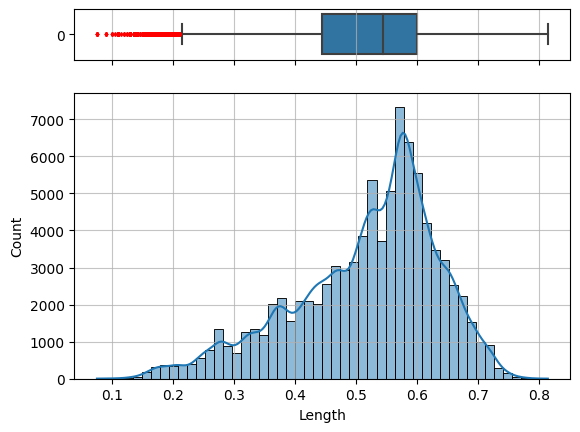

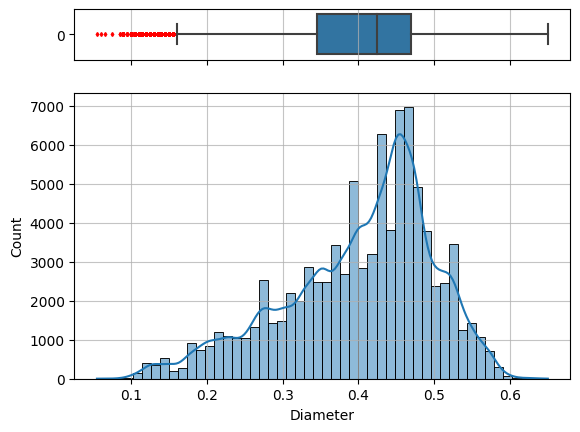

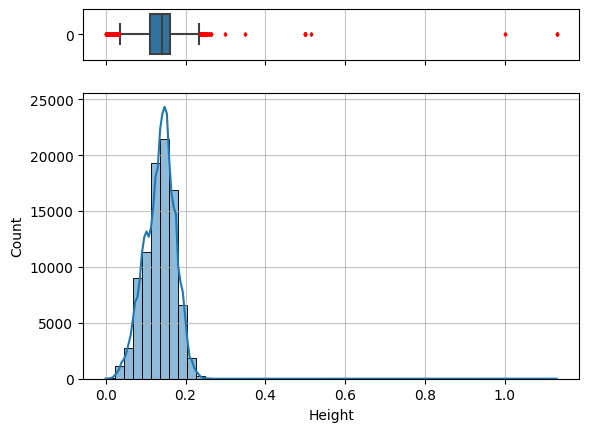

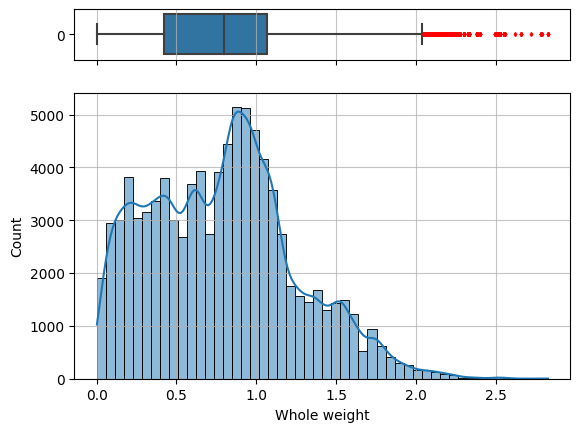

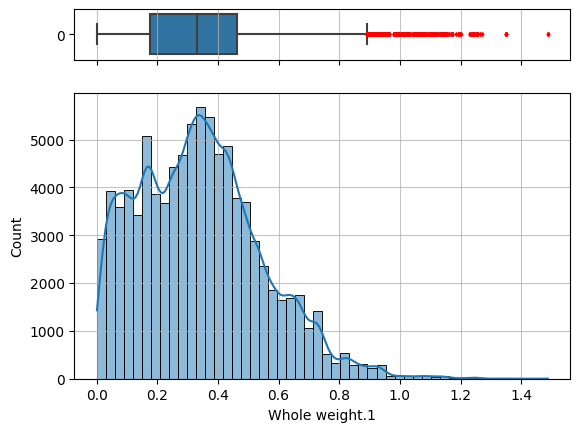

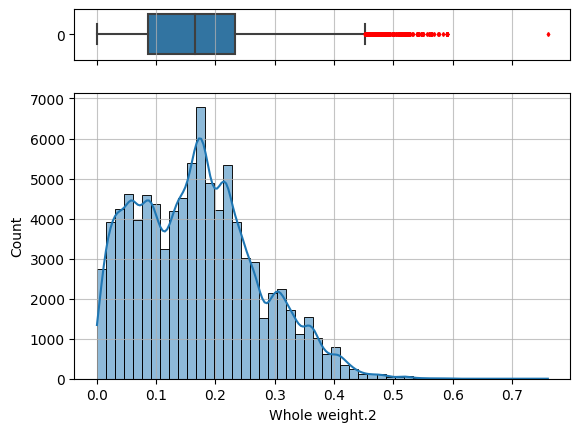

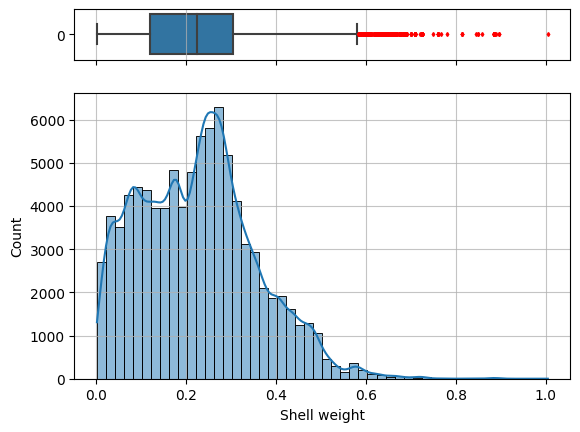

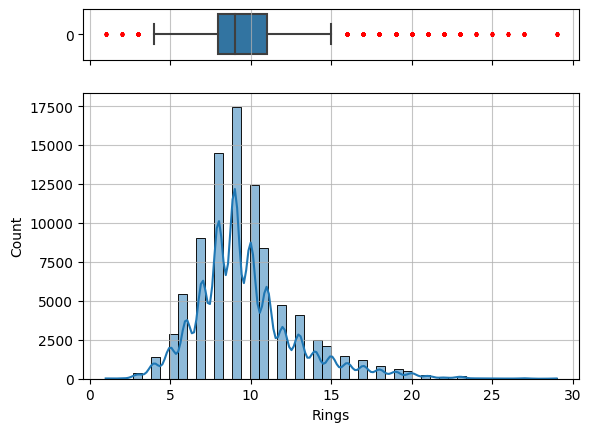

In [8]:
for f in df_numeric:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)})
    ax_box.grid(alpha=0.75)
    ax_hist.grid(alpha=0.75)
    flierprops = dict(
        markerfacecolor="r", markersize=2, linestyle="none", markeredgecolor="r"
    )
    sns.boxplot(df[f], orient="h", ax=ax_box, flierprops=flierprops)
    sns.histplot(df[f], ax=ax_hist, bins=50, kde=True)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.show()

In [57]:
#before preprocessing we should also get our test dataset
df_test = pd.read_csv(r"C:\Data Analysis\Data-Analysis\kaggle\test.csv")

<AxesSubplot: xlabel='Sex', ylabel='Count'>

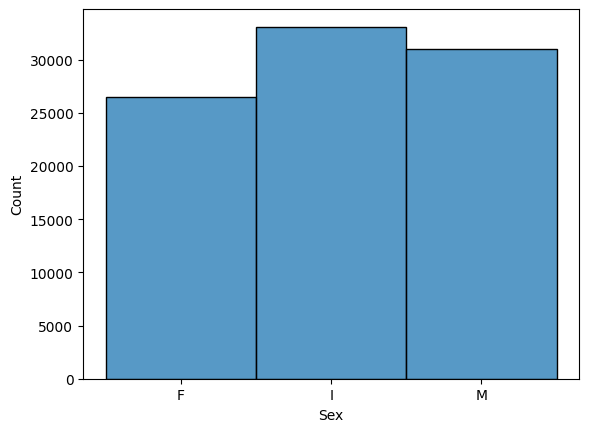

In [10]:
sns.histplot(df["Sex"])

In [11]:
print(len(df))
for f in df_numeric:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + iqr *1.5
    lower_limit = q1 - iqr *1.5
    new_df = df.loc[((df[f]<upper_limit) & (df[f]>lower_limit))]
print(len(new_df), len(df)-len(new_df))
df = new_df
#taking out the outliers

90615
84890 5725


<AxesSubplot: >

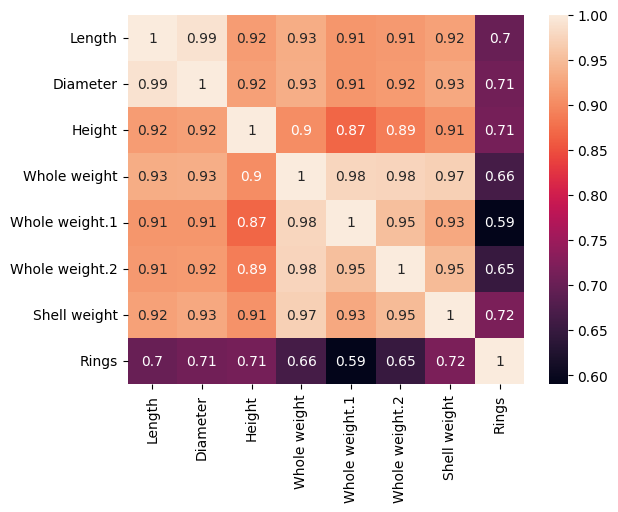

In [12]:
sns.heatmap(df[df_numeric].corr(), annot=True)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV


In [14]:
y = df["Rings"]
x = df.drop(["Rings"], axis=1)
x = pd.get_dummies(x)


In [15]:
scale = StandardScaler()
df_numeric = df.columns[1:-1]
x[df_numeric] = scale.fit_transform(x[df_numeric])

In [61]:
df_test[df_numeric] = scale.fit_transform(df_test[df_numeric])
df_test = pd.get_dummies(df_test)

In [17]:
x.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,
0,0.314081,0.328726,0.444895,0.010800,-0.032469,-0.187974,0.187539,1,0,0
1,0.995962,0.946930,0.310032,0.809902,0.602372,1.116409,0.835388,1,0,0
2,-3.010086,-2.968362,-2.926672,-1.662075,-1.615893,-1.627812,-1.715515,0,1,0
3,0.697639,0.792379,0.444895,0.329549,0.197937,0.404015,0.268520,0,0,1
4,0.356699,0.277209,-0.094556,0.034205,0.168523,-0.052519,-0.156630,0,1,0


In [18]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42, train_size=0.75)

In [25]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import loguniform
params = loguniform(1, 10)
params2 = loguniform (0.0001, 1000)
params3 = loguniform (0, 100)
params4 = range(1, 300)
params5 = loguniform(0.0001, 0.1)
model_params = {
     
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha':params
            }
        },
        "xgbclassifier":
        {
            "model": XGBRegressor(),
            "params": 
            {
              'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': params5, #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': params4
            }
        },
        "decisionTree":
        {
            "model": DecisionTreeRegressor(),
            "params":
            {
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': params5,
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['absolute_error', 'poisson', 'friedman_mse', 'squared_error']
            }
        },
        'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': params4,
            'max_depth': [1,2,3,4]
        }
    }
    }

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score, root_mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x = pca.fit_transform(x)

scores = []

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], scoring=root_mean_squared_log_error,n_iter = 5, return_train_score=False,  cv = cv)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_2

C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\inspect.py", line 3186, in bind
  

[00:25:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[00:25:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[00:25:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[00:25:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[00:25:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\inspect.py", line 3186, in bind
  

[00:25:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[00:25:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[00:25:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[00:25:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[00:25:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[00:25:34] WARNING: 

C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[00:26:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\inspect.py", line 3186, in bind
  

,model,best_score,best_params
0,ridge,NaN,{'alpha': 1.3911856979675459}
1,xgbclassifier,NaN,"{'colsample_bytree': 0.7, 'learning_rate': 0.0..."
2,decisionTree,NaN,"{'ccp_alpha': 0.015617688852460947, 'criterion..."
3,random_forest,NaN,"{'n_estimators': 253, 'max_depth': 3}"


In [42]:
pca.explained_variance_

array([6.73991397, 0.3122541 , 0.20409628])

In [46]:
df_test[df_numeric] = scale.fit_transform(df_test[df_numeric])

In [47]:
df

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6


In [48]:
df_test

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,
90615,1.084723,0.749354,0.504236,0.978913,1.357724,1.420584,0.572887,0,0,1
90616,0.532038,0.595458,0.635213,0.421642,0.672186,0.497228,0.376469,0,0,1
90617,0.361982,0.185071,0.111303,0.108040,0.055201,0.149729,0.110728,0,0,1
90618,0.447010,0.903249,0.242280,0.183436,0.055201,0.169586,0.068363,0,0,1
90619,-0.870931,-0.789599,-0.674563,-0.944219,-0.899656,-1.016876,-0.932982,0,1,0
...,...,...,...,...,...,...,...,...,...,...
151021,-1.466130,-1.456479,-1.329452,-1.338680,-1.310979,-1.418982,-1.356628,0,1,0
151022,0.064382,0.082474,0.242280,0.118967,0.231483,-0.024021,-0.162716,1,0,0
151023,0.617067,0.390265,0.504236,0.725409,0.253518,0.303622,0.299443,0,1,0


In [68]:
pca = PCA(n_components=None)
pca.fit(x)
df_test_2 = pca.transform(df_test)
y_pr = clf.best_estimator_.predict(df_test)

C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


ValueError: X has 11 features, but PCA is expecting 3 features as input.

In [56]:
submission = pd.DataFrame({
    'id': df_test.index,
    'Rings': y_pr
})

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
submission

,id,Rings
0,90615,10.043676
1,90616,9.986617
2,90617,9.447514
3,90618,9.447514
4,90619,7.186651
...,...,...
60406,151021,6.452368
60407,151022,9.445072
60408,151023,9.743521
60409,151024,11.568749


In [ ]:
submission.to_csv("Yusuf Çil Submission.csv", index=False)